Joe Patten
## Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(a) Use the read.csv() function to read the data into R, or the csv library to read in the
data with python. In R you will load the data into a dataframe. In python you may store it as a list
of lists or use the pandas dataframe. Call the loaded data college. Ensure that your column
headers are not treated as a row of data. 

In [2]:
college = pd.read_csv(r'College.csv').rename(columns={'Unnamed: 0':'Institution'})
college.head()

Institution Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

(b) Find the median cost of books for all schools in this dataset.

In [3]:
med = np.median(college['Books'])
print(f'The median cost of books is ${med}.')

The median cost of books is $500.0.


(c) Produce a scatterplot that shows a relationship between two features of your choice in
the dataset. Ensure it has appropriate axis labels and a title. 

Text(0.5, 1.0, 'Relationship Between Applications and Acceptances')

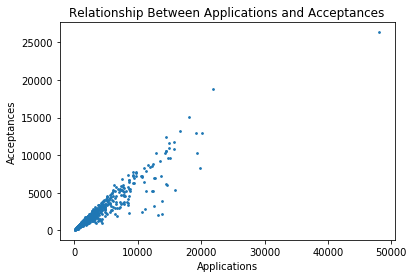

In [4]:
college.plot.scatter(x='Apps', y='Accept', s=3)
plt.xlabel('Applications')
plt.ylabel('Acceptances')
plt.title('Relationship Between Applications and Acceptances')

(d) Produce a histogram showing the overall enrollment numbers (P.Undergrad plus
F.Undergrad) for both public and private (Private) schools. Ensure it has appropriate axis labels
and a title. 

Text(0, 0.5, 'Institutions')

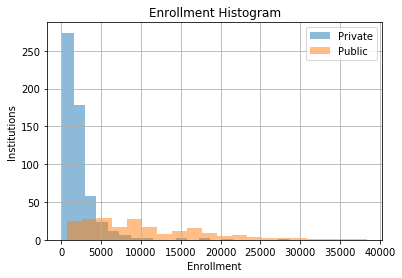

In [5]:
college['enrollment'] = college['F.Undergrad'] + college['P.Undergrad']

college.loc[college['Private']=='Yes', 'enrollment'].hist(bins=20, alpha=.5)
college.loc[college['Private']=='No', 'enrollment'].hist(bins=20, alpha=.5)
plt.legend(['Private','Public'])
plt.title('Enrollment Histogram')
plt.xlabel('Enrollment')
plt.ylabel('Institutions')

(e) Create a new qualitative variable, called Top, by binning the Top25perc variable into
two categories. Specifically, divide the schools into two groups based on whether or not the
proportion of students coming from the top 25% of their high school classes exceeds 50%.
Now produce side-by-side boxplots of acceptance rate (based on Accept and Apps) with respect
to the two Top categories (Yes and No). 

Text(0.5, 1.0, 'Acceptance Rate Boxplot')

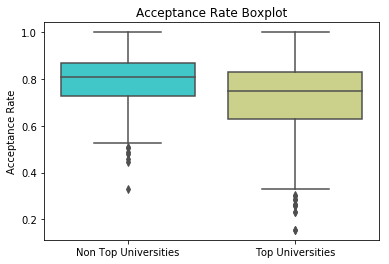

In [48]:
college['Top'] = college['Top25perc'] > 50
college['Acceptance Rate'] = college['Accept']/(college['Apps'])

ax = sns.boxplot(x='Top',y='Acceptance Rate',data=college,palette='rainbow')
ax.set_ylabel('Acceptance Rate')
ax.set_xticklabels(['Non Top Universities', 'Top Universities'])
ax.set_xlabel('')
ax.set_title('Acceptance Rate Boxplot')

How many top universities are there?

In [9]:
print('There are {} top universties.'.format(np.sum(college.Top)))

There are 449 top universties.


(f) Continue exploring the data, producing two or more new plots of any type, and
provide a brief summary of your hypotheses and what you discover. You may use additional
plots or numerical descriptors as needed. Feel free to think outside the box on this one but if you
want something to point you in the right direction, look at the summary statistics for various
features, and think about what they tell you. Perhaps try plotting various features from the
dataset against each other and see if any patterns emerge. 

Hypothesis 1: Top colleges have higher percentages of full time students than non-top colleges.

Hypothesis 2: Acceptance Rate is postitively related to graduation rate.

### Hypothesis 1

Text(0.5, 0, '')

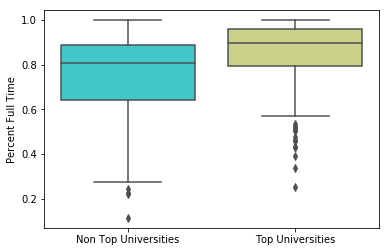

In [46]:
college['Percent Full Time'] = college['F.Undergrad'] / (college['F.Undergrad'] + college['P.Undergrad'])
ax = sns.boxplot(x='Top',y='Percent Full Time',data=college,palette='rainbow')
ax.set_xticklabels(['Non Top Universities', 'Top Universities'])
ax.set_xlabel('')
#ax.get_xticklabels()

It appears that Top Universities tend to have higher percentage of full-time students.

Text(27.125, 0.5, 'Graduation Rate')

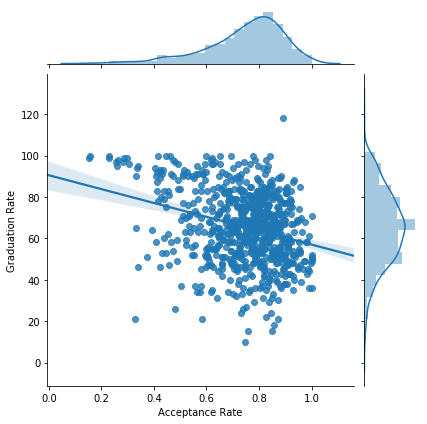

In [50]:
sns.jointplot(x='Acceptance Rate',y='Grad.Rate',data=college,kind='reg')
plt.ylabel('Graduation Rate')

There does not seem to be a clear relationship between acceptance rate and graduation rate.

Odd, there is a college that has above a 100% graduation rate. That college is:

In [12]:
college[college['Grad.Rate'] > 100]

Institution Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College     Yes  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate       ...         Personal  PhD  \
95         1010           12      9384       ...              500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  enrollment    Top  \
95        47       14.3           20    7697        118        1022  False   

    Acceptance Rate  
95         0.892384  

[1 rows x 22 columns]

## Autos

(a) Specify which of the predictors are quantitative, and which are qualitative? Keep in
mind that a qualitative variable may be represented as a quantitative type in the dataset, or the
reverse. You may wish to adjust the types of your variables based on your findings.

In [15]:
auto = pd.read_csv(r'Auto.csv')
auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

The quantitative predictors are:
- mpg
- cylinders (?)
- displacement
- horsepower
- weight
- acceleration
- year

The qualitative predictors are:
- origin
- name

(b) What is the range, mean and standard deviation of each quantitative predictor?

In [24]:
auto[[col for col in auto if col != 'origin']].describe().iloc[pd.np.r_[1:4, 7]]

mpg  cylinders  displacement       weight  acceleration       year
mean  23.515869   5.458438    193.532746  2970.261965     15.555668  75.994962
std    7.825804   1.701577    104.379583   847.904119      2.749995   3.690005
min    9.000000   3.000000     68.000000  1613.000000      8.000000  70.000000
max   46.600000   8.000000    455.000000  5140.000000     24.800000  82.000000

(c) Now remove the 45th through 85th (inclusive) observations from the dataset. What is
the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [27]:
auto[[col for col in auto if col != 'origin']].loc[~auto.index.isin(range(45,86))].describe().iloc[pd.np.r_[1:4, 7]]

mpg  cylinders  displacement       weight  acceleration       year
mean  23.853371   5.455056    193.073034  2969.073034     15.557865  76.485955
std    7.919259   1.678598    102.922507   833.855167      2.742738   3.580436
min    9.000000   3.000000     68.000000  1649.000000      8.000000  70.000000
max   46.600000   8.000000    455.000000  5140.000000     24.800000  82.000000

(d) Using the full data set, investigate the predictors graphically, using scatterplots,
correlation scores or other tools of your choice. Create some plots highlighting the relationships
you find among the predictors. Explain briefly what the relationships between variables are, and
what they mean. 

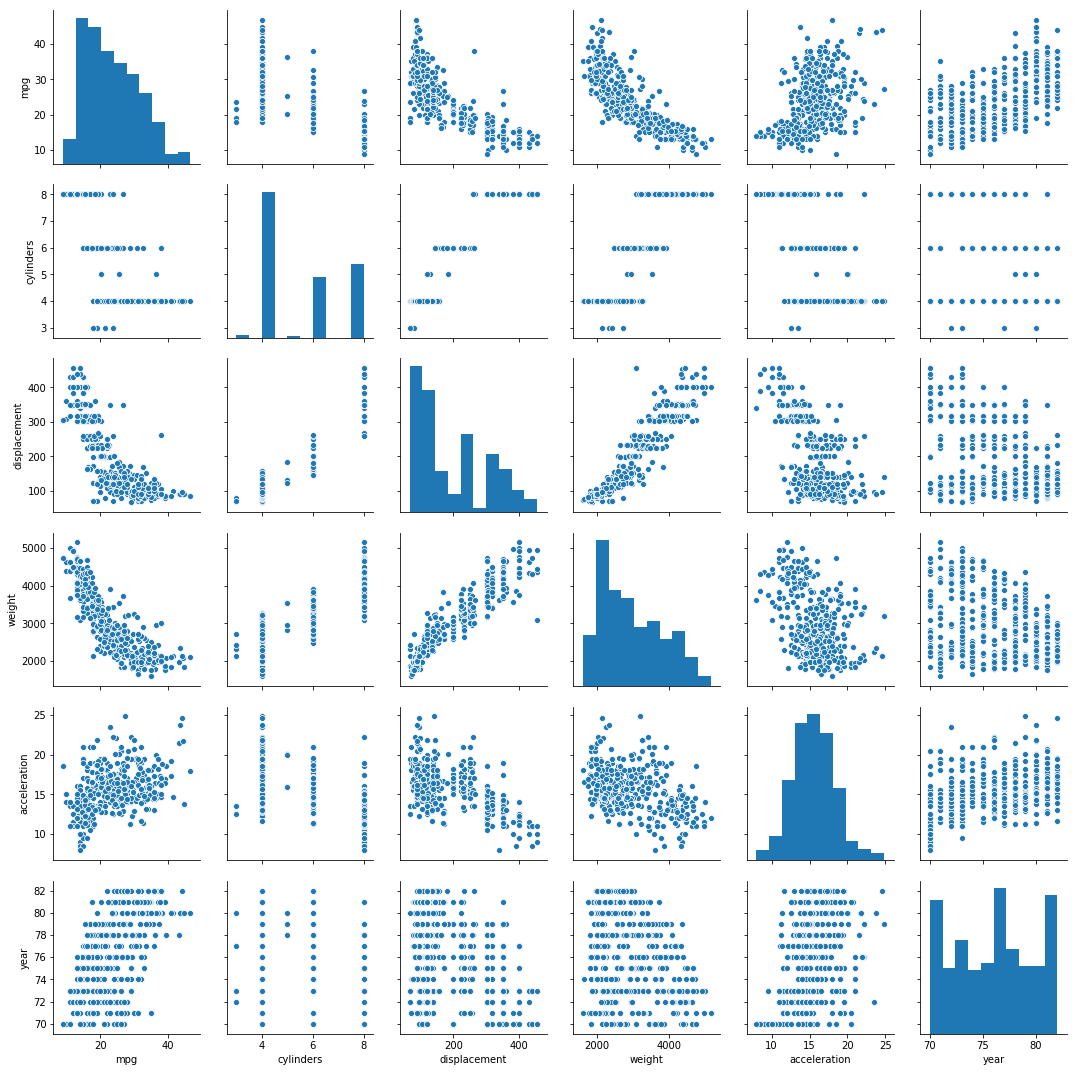

In [36]:
sns.pairplot(auto.drop(columns=['origin']))

(e) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables.
Which, if any, of the other variables might be useful in predicting mpg? Justify your answer.

If we look at the pairplot above, it is evident that there is a negative relationship between displacement and weight, and mpg. This makes sense as the bigger and heavier the car, the worse the gas mileage we would expect. Number of cylinders (which could arguably be categorized as a qualitative variable) also has a negative relationship with mpg. We could use a similar argument (bigger and heavier car means worse gas mileage). Year has a positive relationship with mpg. This makes sense as we would expect car makers to make more efficient cars each year as technology gets better.